In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



```
# This is formatted as code
```

Function for calculation Accuracy

In [ ]:
def calculateAccuracy(A, B):
  counter = 0;
  for i in range(0, len(A)):
    if(A[i] == B[i]):
      counter += 1
  return (counter / len(A)) * 100

Loading Happy Images

In [ ]:
happyImages = [
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject01.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject02.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject04.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject06.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject07.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject09.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject10.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject12.happy.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject13.happy.gif').resize((100, 100))))]


happyImages = np.array(happyImages)/255
print(happyImages.shape)

(9, 10000)


Loading Sad Images

In [ ]:
sadImages = [
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject02.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject03.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject04.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject05.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject06.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject07.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject09.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject10.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject11.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject12.sad.gif').resize((100, 100)))),
    np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/train/subject13.sad.gif').resize((100, 100)))),]

sadImages = np.array(sadImages)/255
print(sadImages.shape)

(11, 10000)


Combining the happy & sad images

In [ ]:
trainData = np.concatenate((happyImages, sadImages), axis=0)
trainData.shape

(20, 10000)

Loading the labels of training data

In [ ]:
trainLabels = []
for i in range(0, 20):
  if i < 9:
    trainLabels.append(1)
  else:
    trainLabels.append(0)
trainLabels = np.array(trainLabels)

Loading the test data

In [ ]:
testData = []
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject03.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject05.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject08.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject11.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject14.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject15.happy.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject01.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject08.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject14.sad.gif').resize((100,100)))))
testData.append(np.concatenate(np.array(Image.open('drive/MyDrive/Data/emotion_classification/test/subject15.sad.gif').resize((100,100)))))
testData = np.array(testData)/255

Loading the labels of test data

In [ ]:
testLabels = []
for i in range(0, 10):
  if i < 6:
    testLabels.append(1)
  else:
    testLabels.append(0)
testLabels = np.array(testLabels)

In [ ]:
combinedData = np.concatenate((trainData, testData), axis = 0)
combinedData.shape

(30, 10000)

Performing PCA & SVM and computing the accuracy on test data for different choices of n_components, kernels, C, and epsilon

In [ ]:
maxAccuracy = []
def SVM(n_components, kernel, C, epsilon):
    PCAObject = PCA(n_components = n_components)
    PCAData = PCAObject.fit_transform(combinedData)
    trainPCAData = PCAData[:20, :]
    trainPCAData.shape
    testPCAData = PCAData[20:, :]
    testPCAData.shape

    SVMObject = svm.SVC(C = C, kernel = kernel, tol = epsilon, random_state = 1)
    SVMObject.fit(trainPCAData, trainLabels)
    predictionSVM = SVMObject.predict(testPCAData)
    print(f'n_components: {n_components}, kernel: {kernel}, C: {C}, epsilon: {epsilon}')
    print(f'Accuracy: {calculateAccuracy(predictionSVM, testLabels)}')
    print("#################################################################################################")
    return calculateAccuracy(predictionSVM, testLabels)

In [ ]:
typesKernel = ['linear', 'sigmoid', 'poly', 'rbf']
C = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]

In [ ]:
maxAccuracySVM = []
for k in range(1,21):
    accuracy = []
    for ker in typesKernel:
        for c in C:
            for ep in epsilon:
                accuracy.append(SVM(k, ker, c, ep))
    maxAccuracySVM.append(max(accuracy))
    # print(f'k: {k}, maximum acc: {max(accuracy)}')

n_components: 1, kernel: linear, C: 0.01, epsilon: 0.01
Accuracy: 40.0
#################################################################################################
n_components: 1, kernel: linear, C: 0.01, epsilon: 0.1
Accuracy: 40.0
#################################################################################################
n_components: 1, kernel: linear, C: 0.01, epsilon: 1
Accuracy: 40.0
#################################################################################################
n_components: 1, kernel: linear, C: 0.1, epsilon: 0.01
Accuracy: 40.0
#################################################################################################
n_components: 1, kernel: linear, C: 0.1, epsilon: 0.1
Accuracy: 40.0
#################################################################################################
n_components: 1, kernel: linear, C: 0.1, epsilon: 1
Accuracy: 40.0
###############################################################################################

Performing PCA & LDA for different choices of n_components

In [ ]:
def LDA(k):
    PCAObject = PCA(n_components = k)
    PCAData = PCAObject.fit_transform(combinedData)

    trainPCAData = PCAData[:20, :]
    trainPCAData.shape
    testPCAData = PCAData[20:, :]
    testPCAData.shape

    LDAObject = LinearDiscriminantAnalysis()
    LDAObject.fit(trainPCAData, trainLabels)
    predictionLDA = LDAObject.predict(testPCAData)
    print(f'n_components: {k}, Accuracy: {calculateAccuracy(predictionLDA, testLabels)}')
    return calculateAccuracy(predictionLDA, testLabels)

In [ ]:
accuracyLDA = []
for i in range(1, 21):
    accuracyLDA.append(LDA(i))

n_components: 1, Accuracy: 40.0
n_components: 2, Accuracy: 40.0
n_components: 3, Accuracy: 60.0
n_components: 4, Accuracy: 60.0
n_components: 5, Accuracy: 80.0
n_components: 6, Accuracy: 100.0
n_components: 7, Accuracy: 70.0
n_components: 8, Accuracy: 80.0
n_components: 9, Accuracy: 80.0
n_components: 10, Accuracy: 90.0
n_components: 11, Accuracy: 80.0
n_components: 12, Accuracy: 70.0
n_components: 13, Accuracy: 60.0
n_components: 14, Accuracy: 60.0
n_components: 15, Accuracy: 60.0
n_components: 16, Accuracy: 60.0
n_components: 17, Accuracy: 60.0
n_components: 18, Accuracy: 60.0
n_components: 19, Accuracy: 70.0
n_components: 20, Accuracy: 80.0


# Comparison between SVM & LDA

1.   **n_components** = 1 **Max Accuracy SVM** = 40% **Max Accuracy LDA** = 40
2.   **n_components** = 2 **Max Accuracy SVM** = 50% **Max Accuracy LDA** = 40
3.   **n_components** = 3 **Max Accuracy SVM** = 50% **Max Accuracy LDA** = 60
4.   **n_components** = 4 **Max Accuracy SVM** = 60% **Max Accuracy LDA** = 60
5.   **n_components** = 5 **Max Accuracy SVM** = 60% **Max Accuracy LDA** = 80
6.   **n_components** = 6 **Max Accuracy SVM** = 100% **Max Accuracy LDA** = 100
7.   **n_components** = 7 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 70
8.   **n_components** = 8 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 80
9.   **n_components** = 9 **Max Accuracy SVM** = 100% **Max Accuracy LDA** = 80
10.  **n_components** = 10 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 90
11.  **n_components** = 11 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 80
12.  **n_components** = 12 **Max Accuracy SVM** = 80% **Max Accuracy LDA** = 70
13.  **n_components** = 13 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
14.  **n_components** = 14 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
15.  **n_components** = 15 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
16.  **n_components** = 16 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
17.  **n_components** = 17 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
18.  **n_components** = 18 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 60
19.  **n_components** = 19 **Max Accuracy SVM** = 100% **Max Accuracy LDA** = 70
20.  **n_components** = 20 **Max Accuracy SVM** = 90% **Max Accuracy LDA** = 80






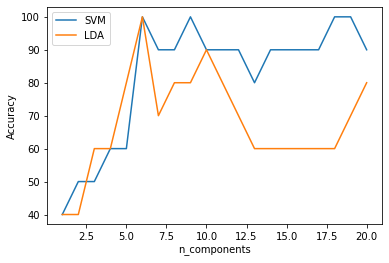

In [ ]:
plt.plot([i for i in range(1,21)], maxAccuracySVM, label = 'SVM')
plt.plot([i for i in range(1,21)], accuracyLDA, label = 'LDA')
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can easily see that at n_components = 6 both have 100% accuracy, but after that LDA's accuracy decreases as increment in n_components, but SVM has avg accuracy of 91% as increment in n_components. Both have same accuracy upto n_components = 6. It means LDA works better when dimension of data is low.